# LCFit band-by-band using python (`pycoco`)
---
## Aim
To fit the band with the best sampling first, then propagate the best fit params forward as a initial guess for the other bands. Should help constrain the peak.

In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import sys
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.defaults)
reload(pcc.functions)

import pyCoCo as pccsims

In [2]:
# filter_path = "/Users/berto/Code/CoCo/data/filters"
# coco_root_path = "/Users/berto/Code/CoCo"
coco_root_path = os.environ["COCO_ROOT_DIR"]
filter_path = os.path.join(coco_root_path, "data/filters")

coco = pccsims.pyCoCo(pcc.utils.b(filter_path), pcc.utils.b(coco_root_path))

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [3]:
sn = pcc.SNClass("SN2006aj")
print(sn.name)
sn.load_phot( path = os.path.join(coco_root_path, 'data/lc/' + sn.name + '.dat'))
sn.load_list(os.path.join(coco_root_path,"lists/" + sn.name + ".list"))
sn.load_spec()
# sn.check_overlaps()
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

SN2006aj
/Users/berto/Code/CoCo/data/lc/SN2006aj.dat


<IPython.core.display.Javascript object>


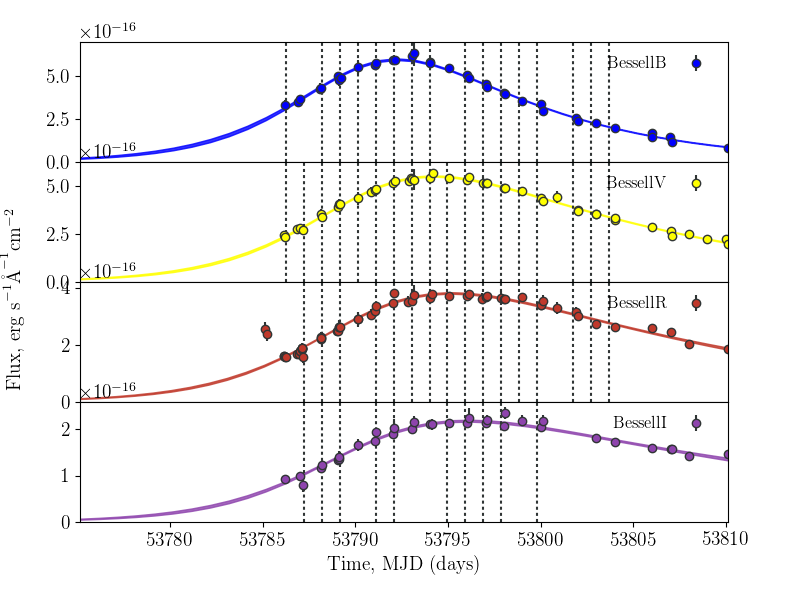

In [4]:
sn.plot_lc()

## Find the band with the best data
---
What metric to use...
 
 - Epochs?
 - S/N 

In [9]:
verbose=True

for band in sn.phot.data:
    if verbose: print(band)
    length = len(sn.phot.data[band])
    print(length)

BessellB
36
BessellV
47
BessellR
58
BessellI
34
